# Das Rucksackproblem

Im Folgenden finden Sie das Rucksackproblem, das einerseits durch die sogenannte erschöpfende Suche (im Englischen
Brute Force) und andererseits mit Hilfe dynamischer Optimierung gelöst wird. Zudem werden die Laufzeiten graphisch
dargestellt. Dabei wird sowohl die Laufzeit für zunehmend größere Rucksäcke dargestellt, als auch für die Verwendung
in den beiden genannten Methoden.

In [4]:
import time
import matplotlib.pyplot as plt
import numpy as np

"""Definition globaler Variablen"""
# Globale Variablen für die Testdaten-Erstellung
start = 16
stop = 26
step_size = 1

# Daten für die graphische Darstellung
time_knapsack_arr = []
objects_knapsack_arr = []

time_dynamic_arr = []
objects_dynamic_arr = []

"""
 Rucksackproblem mit erschöpfender Suche
 W =    Gesamtkapazität
 wt =   Gewichtsarray
 val =  Wertearray
 n =    Anzahl der Objekte
 """
def knap_sack(W, wt, val, n):
    # initiale Zuweisung
    if n == 0 or W == 0:
        return 0
    # Wenn das Gewicht des aktuellen Objekts höher ist als die Kapazität, wird es nicht eingepackt
    if (wt[n-1] > W):
        return knap_sack(W, wt, val, n-1)
    # Rückgabe des n-ten Elements, das entweder enthalten ist oder nicht
    else:
        return max(val[n-1] + knap_sack(W-wt[n-1], wt, val, n-1),
                   knap_sack(W, wt, val, n-1))

"""
 Rucksackproblem mit dynamischer Programmierung
 W =    Gesamtkapazität
 wt =   Gewichtsarray
 val =  Wertearray
 n =    Anzahl der Objekte
 """
def knapsack_dynamic(W, wt, val, n):
    # Bauen des zweidimensionalen Arrays als Memory und füllen mit 0
    solution_table = [[0 for x in range(W + 1)] for x in range(n + 1)]

    # Durchlaufe alle Objekte
    for current_object in range(n + 1):

        # Durchlaufe alle möglichen Gewichts-Teilmengen
        for current_max_weight in range(W + 1):

            # Wenn aktuelles maximum = 0 (oder wir noch keine anderen Einträge zum vergleichen haben)
            if current_max_weight == 0 or current_object == 0:
                # Passt auch nichts in den Rucksack
                solution_table[current_object][current_max_weight] = 0

            # Wenn der aktuelle Gegenstand in den Rucksack passen würde, ...
            elif wt[current_object-1] <= current_max_weight:

                # Wird geprüft ob der aktuelle Gegenstand eine bessere Verteilung erzielen würde
                solution_table[current_object][current_max_weight] = \
                    max(
                        # Wert des aktuellen Objektes + *Bisheriges Optimum für restliche Kapazität*
                        val[current_object-1] + solution_table[current_object-1][current_max_weight-wt[current_object-1]],
                        # Bisheriges Optimum
                        solution_table[current_object-1][current_max_weight]
                    )

            # Gegenstand würde nicht in Rucksack passen
            else:
                # Verwende stattdessen bisheriges Maximum
                solution_table[current_object][current_max_weight] = solution_table[current_object-1][current_max_weight]

    # Gib untere rechte Ecke (= optimale Verteilung für gesamten Rucksack unter Berücksichtigung aller Objekte) zurück
    return solution_table[n][W]


"""Funktion zum Festhalten der Laufzeit und zur Ausgabe relevanter Informationen für die erschöpfende Suche
 W =    Gesamtkapazität
 wt =   Gewichtsarray
 val =  Wertearray
 n =    Anzahl der Objekte"""
def knapsack_time(W, wt, val, n):
    objects_knapsack_arr.append(n)
    start = time.time()
    optimum = knap_sack(W, wt, val, n)
    end = time.time()
    time_knapsack_arr.append(end - start)

    print("Maximaler Wert:", optimum)
    print("Rucksackgröße::", W)
    print("Anzahl Objekte:", n)
    print("Laufzeit:", end - start, "Sekunden\n")

"""Funktion zum Festhalten der Laufzeit und zur Ausgabe relevanter Informationen für die dynamische Programmierung
 W =    Gesamtkapazität
 wt =   Gewichtsarray
 val =  Wertearray
 n =    Anzahl der Objekte"""
def knapsack_time_dynamic(W, wt, val, n):
    objects_dynamic_arr.append(n)
    start = time.time()
    optimum = knapsack_dynamic(W, wt, val, n)
    end = time.time()
    time_dynamic_arr.append(end - start)

    print("Maximaler Wert:", optimum)
    print("Rucksackgröße::", W)
    print("Anzahl Objekte:", n)
    print("Laufzeit:", end - start, "Sekunden\n")


"""Erstellen von Testdaten und Anstoßen der Funktion"""
for size in range(start, stop, step_size):
    val = np.random.randint(1, 40, size)
    wt = np.random.randint(1, 40, size)
    W = size * 10
    n = len(val)
    print("Erschöpfende Suche")
    knapsack_time(W, wt, val, n)
    print("Dynamische Programmierung")
    knapsack_time_dynamic(W, wt, val, n)

Erschöpfende Suche
Maximaler Wert: 289
Rucksackgröße:: 160
Anzahl Objekte: 16
Laufzeit: 0.03310418128967285 Sekunden

Dynamische Programmierung
Maximaler Wert: 289
Rucksackgröße:: 160
Anzahl Objekte: 16
Laufzeit: 0.0010004043579101562 Sekunden

Erschöpfende Suche
Maximaler Wert: 296
Rucksackgröße:: 170
Anzahl Objekte: 17
Laufzeit: 0.06618428230285645 Sekunden

Dynamische Programmierung
Maximaler Wert: 296
Rucksackgröße:: 170
Anzahl Objekte: 17
Laufzeit: 0.0010008811950683594 Sekunden

Erschöpfende Suche
Maximaler Wert: 313
Rucksackgröße:: 180
Anzahl Objekte: 18
Laufzeit: 0.13840055465698242 Sekunden

Dynamische Programmierung
Maximaler Wert: 313
Rucksackgröße:: 180
Anzahl Objekte: 18
Laufzeit: 0.001018524169921875 Sekunden

Erschöpfende Suche
Maximaler Wert: 327
Rucksackgröße:: 190
Anzahl Objekte: 19
Laufzeit: 0.10425591468811035 Sekunden

Dynamische Programmierung
Maximaler Wert: 327
Rucksackgröße:: 190
Anzahl Objekte: 19
Laufzeit: 0.0020020008087158203 Sekunden

Erschöpfende Suche
Ma

## Darstellung als Graph

An dieser Stelle werden die Ergebnisse graphisch dargestellt.

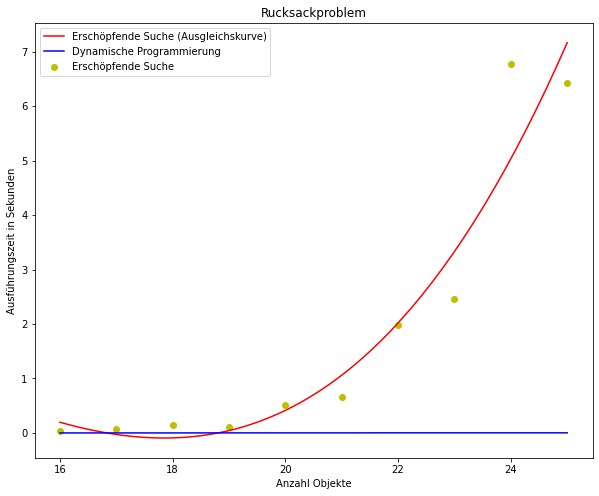

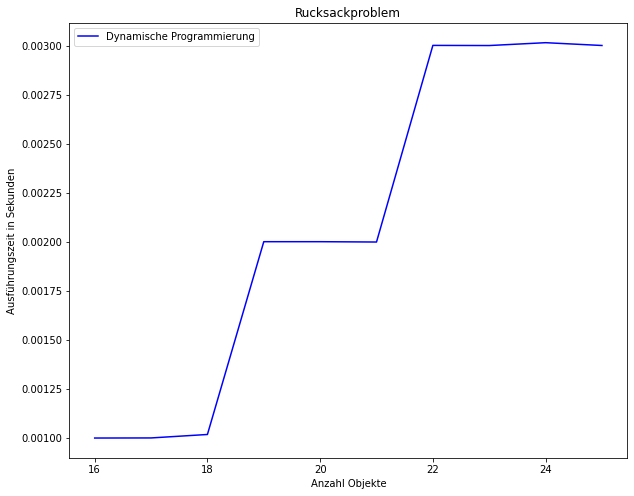

In [5]:
"""Erstellung Ausgleichskurve"""
polynomialModel = np.poly1d(np.polyfit(objects_knapsack_arr, time_knapsack_arr, 3))
polyline = np.linspace(start, stop - 1, 50)

"""Erstellung des Graphen"""
plt.figure(figsize = (10, 8))
plt.scatter(objects_knapsack_arr, time_knapsack_arr, label="Erschöpfende Suche", color='y')
plt.plot(polyline, polynomialModel(polyline), label="Erschöpfende Suche (Ausgleichskurve)", color='r')
plt.plot(objects_dynamic_arr, time_dynamic_arr, label="Dynamische Programmierung", color='b')
plt.xlabel("Anzahl Objekte")
plt.ylabel("Ausführungszeit in Sekunden")
plt.title("Rucksackproblem")
plt.legend()

"""Erstellung des Graphen für die dynamische Programmierung"""
plt.figure(figsize = (10, 8))
plt.plot(objects_dynamic_arr, time_dynamic_arr, label="Dynamische Programmierung", color='b')
plt.xlabel("Anzahl Objekte")
plt.ylabel("Ausführungszeit in Sekunden")
plt.title("Rucksackproblem")
plt.legend()